In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet 
from nltk.tokenize import word_tokenize 
from sklearn.model_selection import train_test_split

In [121]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Количество твитов по значению

<Axes: xlabel='target', ylabel='count'>

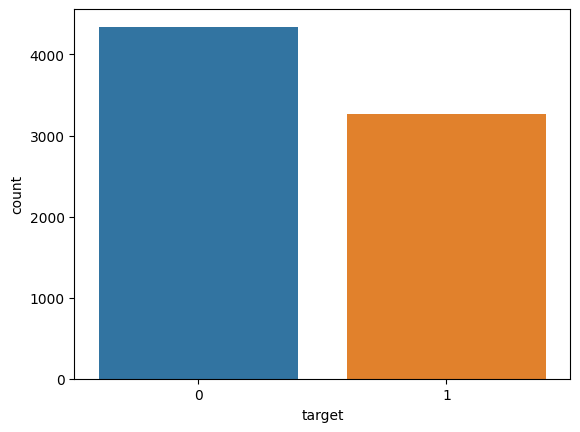

In [122]:
sns.countplot(x='target', data=train)

In [123]:
train['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [124]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Количество твитов,у которых нет ключевых слов, по значению 

<Axes: xlabel='target', ylabel='count'>

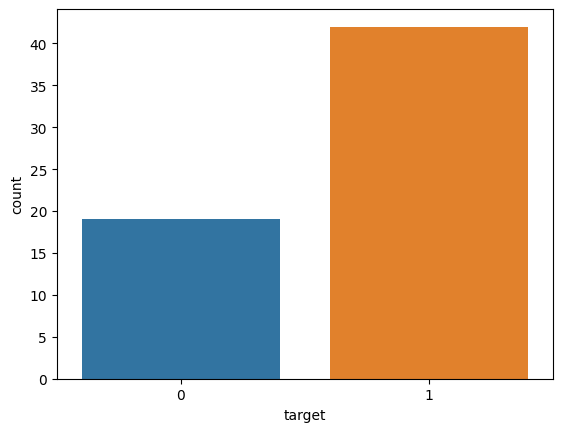

In [125]:
filtered_data = train[train['keyword'].isna()]
sns.countplot(x='target', data=filtered_data)


Количество твитов,у которых есть ключевые слова, по значению 

<Axes: xlabel='target', ylabel='count'>

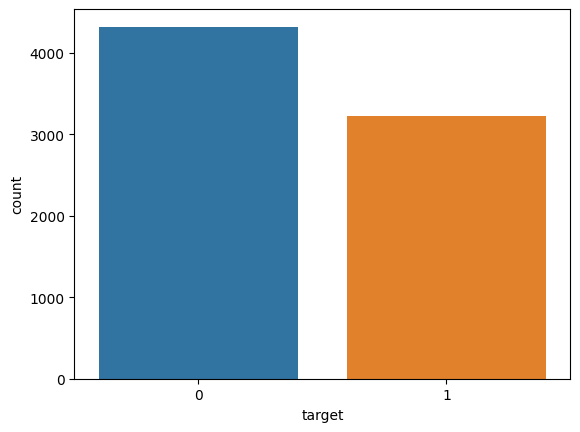

In [126]:
filtered_data = train[train['keyword'].notna()]
sns.countplot(x='target', data=filtered_data)

In [127]:
train = train.drop('location', axis=1)
train.head()

,id,keyword,text,target
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [128]:
train['CombinedText'] = train['keyword'].fillna('') + ' ' + train['text'].fillna('')
train

,id,keyword,text,target,CombinedText
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake ...
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada
2,5,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are...
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation o..."
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as...
...,...,...,...,...,...
7608,10869,NaN,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse in...
7609,10870,NaN,@aria_ahrary @TheTawniest The out of control w...,1,@aria_ahrary @TheTawniest The out of control ...
7610,10871,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. ht...
7611,10872,NaN,Police investigating after an e-bike collided ...,1,Police investigating after an e-bike collided...


Данные у которых есть ссылка в тексте

<Axes: xlabel='target', ylabel='count'>

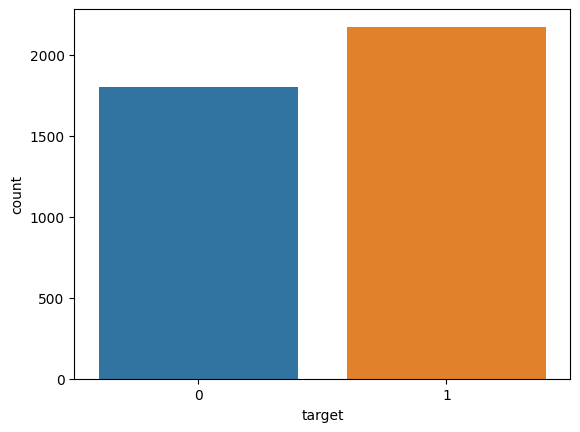

In [129]:
filtered_data = train[train['text'].str.contains(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', flags=re.IGNORECASE, regex=True)]

sns.countplot(x='target', data=filtered_data)


Данные у которых нет ссылки в тексте

<Axes: xlabel='target', ylabel='count'>

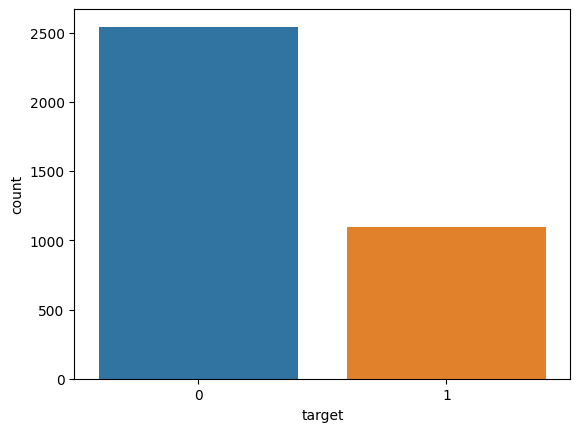

In [130]:
filtered_data = train[~train['text'].str.contains(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', flags=re.IGNORECASE, regex=True)]


sns.countplot(x='target', data=filtered_data)


In [131]:
def preparation (text): 
    text = text.lower() 
    text=text.strip()
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
 
    text=re.compile('<.*?>').sub('', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+',' ',text)
    text = [i for i in text.split() if i not in stopwords.words('english')]
    return ' '.join(text)

In [132]:
train['clean_text'] = train['CombinedText'].apply(preparation)
train

,id,keyword,text,target,CombinedText,clean_text
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake ...,deeds reason earthquake may allah forgive us
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,5,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are...,residents asked shelter place notified officer...
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation o...",13000 people receive wildfires evacuation orde...
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as...,got sent photo ruby alaska smoke wildfires pou...
...,...,...,...,...,...,...
7608,10869,NaN,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse in...,two giant cranes holding bridge collapse nearb...
7609,10870,NaN,@aria_ahrary @TheTawniest The out of control w...,1,@aria_ahrary @TheTawniest The out of control ...,ariaahrary thetawniest control wild fires cali...
7610,10871,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. ht...,m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj
7611,10872,NaN,Police investigating after an e-bike collided ...,1,Police investigating after an e-bike collided...,police investigating ebike collided car little...


In [133]:
wl = WordNetLemmatizer()
 
def postag (tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatizer(text):
    text = nltk.pos_tag(word_tokenize(text)) 
    text =[wl.lemmatize(tag[0], postag(tag[1])) for idx, tag in enumerate(text)] 
    return " ".join(text)

In [134]:
train['clean_text'] = train['clean_text'].apply(lemmatizer)
train

,id,keyword,text,target,CombinedText,clean_text
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this #earthquake ...,deed reason earthquake may allah forgive u
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,5,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to 'shelter in place' are...,resident ask shelter place notify officer evac...
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation o...",13000 people receive wildfire evacuation order...
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby #Alaska as...,get sent photo ruby alaska smoke wildfires pou...
...,...,...,...,...,...,...
7608,10869,NaN,Two giant cranes holding a bridge collapse int...,1,Two giant cranes holding a bridge collapse in...,two giant crane hold bridge collapse nearby ho...
7609,10870,NaN,@aria_ahrary @TheTawniest The out of control w...,1,@aria_ahrary @TheTawniest The out of control ...,ariaahrary thetawniest control wild fire calif...
7610,10871,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. ht...,m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj
7611,10872,NaN,Police investigating after an e-bike collided ...,1,Police investigating after an e-bike collided...,police investigate ebike collide car little po...


In [135]:
X_train, X_test, y_train, y_test = train_test_split(train["clean_text"],train["target"],test_size = 0.20,random_state = 10)

In [136]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train_BOW = vectorizer.fit_transform(X_train)
X_test_BOW = vectorizer.transform(X_test)

In [137]:
from sklearn.svm import SVC

In [138]:
from sklearn.metrics import accuracy_score


Точность тренировочного

In [139]:
svc_BOW = SVC()
svc_BOW.fit(X_train_BOW, y_train)
y_predict_BOW = svc_BOW.predict(X_train_BOW)
accuracy_score(y_predict_BOW, y_train)


0.9446633825944171

Точность тестового

In [140]:
svc_BOW = SVC()
svc_BOW.fit(X_train_BOW, y_train)
y_predict_BOW = svc_BOW.predict(X_test_BOW)
accuracy_score(y_predict_BOW, y_test)

0.8036769533814839

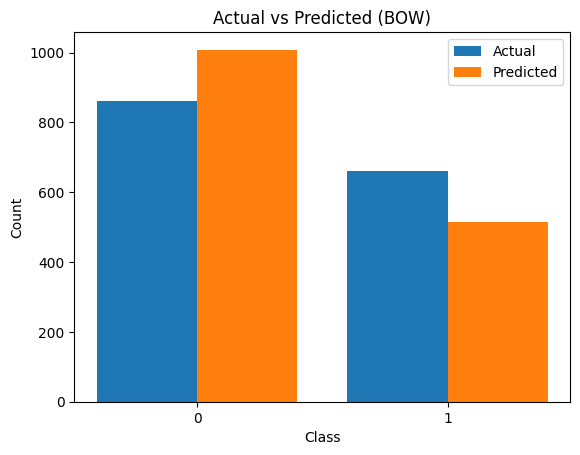

In [141]:
import numpy as np
y_values = np.unique(y_test)
y_indices = np.arange(len(y_values))


actual_counts = [np.sum(y_test == value) for value in y_values]
predicted_counts = [np.sum(y_predict_BOW == value) for value in y_values]

plt.bar(y_indices - 0.2, actual_counts, width=0.4, label='Actual')
plt.bar(y_indices + 0.2, predicted_counts, width=0.4, label='Predicted')

plt.xticks(y_indices, y_values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Actual vs Predicted (BOW)')
plt.legend()

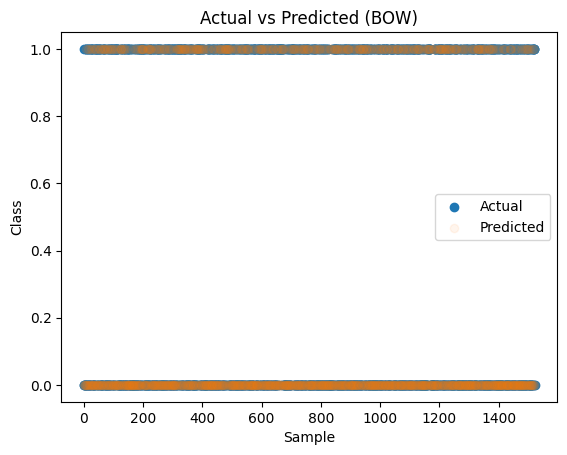

In [142]:
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=1)
plt.scatter(range(len(y_test)), y_predict_BOW, label='Predicted', alpha=0.07)

plt.xlabel('Sample')
plt.ylabel('Class')
plt.title('Actual vs Predicted (BOW)')
plt.legend()
plt.show()